# Reflacx
Krzysztof Wolny 305765


This dataset is separated into two folders, main_data, containing the main files for the intended use of the dataset and metadata tables, and gaze_data, which is more significant in data size and contains the complete recorded eye-tracking data in 1000 Hz. I concentrated on analysis of main_data. 

- `main_data/metadata_phase_<phase>.csv`:
  * `id` (string): used to identify each chest x-ray reading.
  * `split` (string): the split (train, validate or test) given by the MIMIC-CXR dataset.
  * `eye_tracking_data_discarded` (Boolean): this column is True in the small subset of 20 images from phases 1 and 2 that had their eye-tracking data discarded, but the validation labels were kept to allow us to calculate the variability scores for these phases. The fixations.csv, gaze.csv, timestamps_transcription.csv, and transcription.txt files are not provided for cases for which this column is True.
  * `image` (string): folder location of the used chest x-ray in the MIMIC-CXR dataset.
  * `dicom_id` (string): id identifying the read chest x-ray that can be used to link this table with the MIMIC-CXR tables.
  * `subject_id` (string): id of the patient of the chest x-ray, from the MIMIC-CXR and MIMIC-IV datasets.
  * `image_size_x` , `image_size_y` (int): horizontal and vertical sizes of the chest x-ray, in pixels.
  * `Airway wall thickening`, `Atelectasis`, `Consolidation`, `Emphysema`, `Enlarged cardiac silhouette`, `Fibrosis`, `Fracture`, `Groundglass opacity`, `Mass`, `Nodule`, `Pleural effusion`, `Pleural thickening`, `Pneumothorax`, `Pulmonary edema`, `Wide mediastinum` (phase 1); `Abnormal mediastinal contour`, `Acute fracture`, `Atelectasis`, `Consolidation`, `Enlarged cardiac silhouette`, `Enlarged hilum`, `Groundglass opacity`, `Hiatal hernia`, `High lung volume / emphysema`, `Interstitial lung disease`, `Lung nodule or mass`, `Pleural abnormality`, `Pneumothorax`, `Pulmonary edema` (phases 2 and 3) (int): columns for the certainty of image-level labels, with values from 0 to 5, representing the maximum certainty selected over all ellipses drawn for the label, with the following representation: 0: not selected by radiologist, 1: Unlikely (<10%), 2: Less Likely (\~25%), 3: Possibly (\~50%), 4: Suspicious for/Probably (~75%), 5: Consistent with (>90%).
  * `Quality issue`, `Support devices` (phase 1); `Support devices` (phases 2 and 3) (Boolean): image-level labels with only presence indicated.
  * `Other` (string): written additional labels, separated by a "|" symbol.
- `main_data/<id>/fixations.csv`: list of fixations, i.e., stabilizations of the gaze of the radiologist in a specific location, for the <id> reading.
  * `timestamp_start_fixation`, `timestamp_end_fixation` (float): time when the fixation started and ended. The difference between these two values may be used as a weighting of the importance of that fixation.
  * `x_position`, `y_position` (int): average position for the fixation, in image space.
  * `pupil_area_normalized` (float): area of the pupil, normalized by the pupil area measured during calibration at the beginning of the data collection session.
  * `window_level`, `window_width` (float): variables representing the average windowing state over the fixation. Images were shown according to

In [2]:
import numpy as np
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data analysis
I concentrated on main_data

In [3]:
FILE_NAME = "reflacx-reports-and-eye-tracking-data-for-localization-of-abnormalities-in-chest-x-rays-1.0.0"
MAIN_PATH = "/main_data"

main_data = {}
metadata = []
with zipfile.ZipFile(FILE_NAME+".zip") as archive:
    for file in archive.namelist(): 
        if file.startswith(FILE_NAME+MAIN_PATH+"/metadata_phase"):
            metadata.append(pd.read_csv(archive.open(file)))
        elif file.startswith(FILE_NAME+MAIN_PATH):
            id = file.split("/")
            if not id[2] in main_data:
                main_data[id[2]] = []
            main_data[id[2]].append(pd.read_csv(archive.open(file)))

In [4]:
main_data["P110R247624"][0]

,xmin,ymin,xmax,ymax,certainty,Airway wall thickening,Atelectasis,Consolidation,Emphysema,Enlarged cardiac silhouette,...,Mass,Nodule,Other,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary edema,Quality issue,Support devices,Wide mediastinum
0,38,649,1187,2765,5,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1302,1568,2138,2757,3,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,35,702,1132,2752,4,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [8]:
metadata[0].head(3)

,id,split,eye_tracking_data_discarded,image,dicom_id,subject_id,image_size_x,image_size_y,Airway wall thickening,Atelectasis,...,Mass,Nodule,Other,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary edema,Quality issue,Support devices,Wide mediastinum
0,P102R108387,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0,0,...,0,0,NaN,0,0,0,0,False,True,0
1,P102R379837,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0,0,...,0,0,NaN,0,0,0,0,False,True,0
2,P102R558314,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,4,0,...,0,0,NaN,0,0,0,0,False,True,0


### How many examples do we have?

In [6]:
print("Number of examples: ", len(main_data))

Number of examples:  3052


### How many patients don't have any anomalies? 

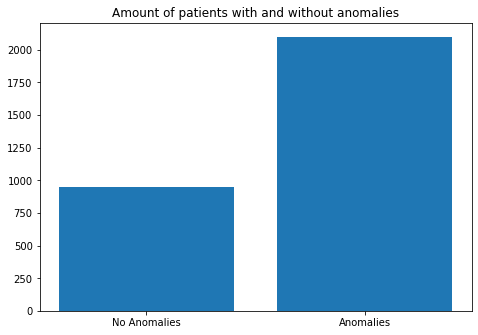

In [7]:
n_healthy_patients = 0
for m in main_data:
    n_healthy_patients += main_data[m][0].empty

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["No Anomalies", "Anomalies"], [n_healthy_patients, len(main_data)-n_healthy_patients])
plt.title("Amount of patients with and without anomalies")
plt.show()

### What anomalies are the most common?

In [8]:
anom_names = ["Airway wall thickening", "Atelectasis", "Consolidation", "Emphysema", "Enlarged cardiac silhouette", "Fibrosis", 
              "Fracture", "Groundglass opacity", "Mass", "Nodule", "Pleural effusion", "Pleural thickening", "Pneumothorax", 
              "Pulmonary edema", "Wide mediastinum", "Abnormal mediastinal contour", "Acute fracture", "Enlarged hilum", "Hiatal hernia", 
              "High lung volume", "Interstitial lung disease", "Lung nodule or mass", "Pleural abnormality", 'Support devices', "Other", 
              'High lung volume / emphysema', "Quality issue"]
anomalies = {}

for name in anom_names: 
    anomalies[name] = 0

for m in main_data: # 5:22
    asum = np.sum(main_data[m][0])
    for name in asum.index: 
        if name in anom_names: 
            anomalies[name] += asum[name]

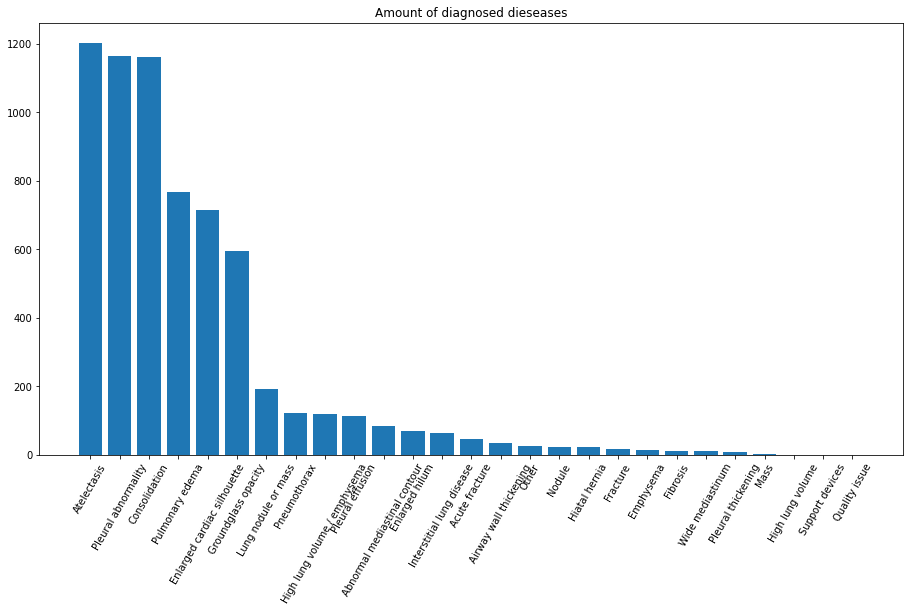

In [9]:
names = list(anomalies.keys())
values = list(anomalies.values())
anom_df = pd.DataFrame({"values": values, "names": names})

anom_df_sorted_desc= anom_df.sort_values('values',ascending=False)


fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
plt.bar('names', 'values',data=anom_df_sorted_desc)
plt.title("Amount of diagnosed dieseases")
plt.xticks(rotation=60)
plt.show()

Atelectasis (at-uh-LEK-tuh-sis) is a complete or partial collapse of the entire lung or area (lobe) of the lung. It occurs when the tiny air sacs (alveoli) within the lung become deflated or possibly filled with alveolar fluid.

Atelectasis is one of the most common breathing (respiratory) complications after surgery. It's also a possible complication of other respiratory problems, including cystic fibrosis, lung tumors, chest injuries, fluid in the lung and respiratory weakness. You may develop atelectasis if you breathe in a foreign object.

By Mayo Clinic Staff

### Were doctors sure about their diagnostics? 

In anomaly_location_elipses.csv in certainty column we have scale from 1-5, that shows how sure doctors were sure about their diagnosis. 

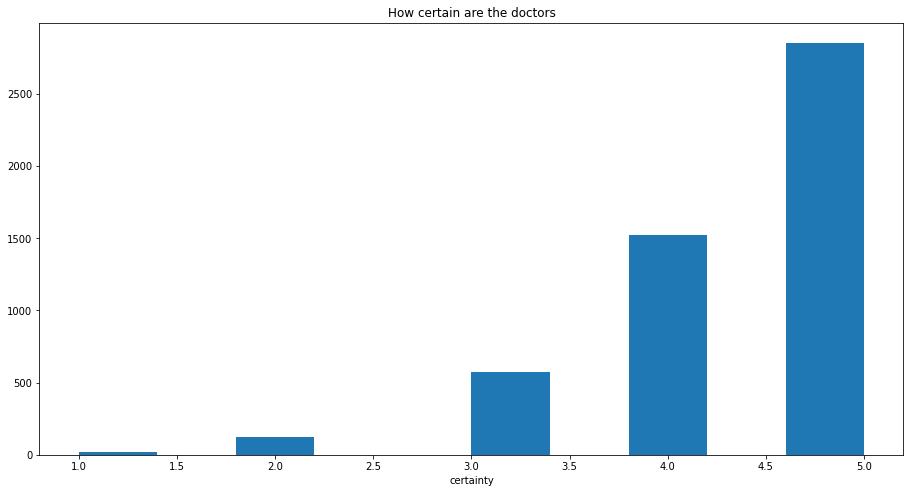

In [10]:
certainty = []
for m in main_data:
    if main_data[m][0]["certainty"].any(): 
        for c in main_data[m][0]["certainty"].values:
            certainty.append(c)

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
plt.hist(certainty)
plt.title("How certain are the doctors")
plt.xlabel("certainty")
plt.show()

### Where are detected abnormalities?

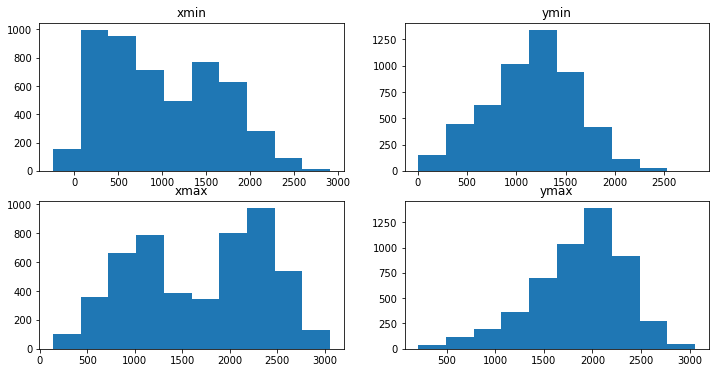

In [11]:
xy_name = ["xmin","ymin","xmax","ymax"]
xy = [[],[],[],[]]
for m in main_data:
    val = main_data[m][0]
    for i in range(len(xy)):
        v = val[xy_name[i]].values
        for k in v:
            xy[i].append(k)
            
fig, axs = plt.subplots(2, 2, figsize=(12,6))
axs[0, 0].hist(xy[0])
axs[0, 0].set_title(xy_name[0])
axs[0, 1].hist(xy[1])
axs[0, 1].set_title(xy_name[1])
axs[1, 0].hist(xy[2])
axs[1, 0].set_title(xy_name[2])
axs[1, 1].hist(xy[3])
axs[1, 1].set_title(xy_name[3])
plt.show()

Wyniki, które otrzymaliśmy jak najbardziej mają sens. Patrząc na x widać wyraźnie podział gdzie znajdują się płuca. Natomiast przy y, to min zawsze będzie mniejsze od max, więc widzimy, że ymin jest skośny w lewo, a ymax w prawo

### How long were docters looking at the abnormalities in relate to whole time of diagnostics?

In [51]:
time_total = []
time_at_ab = []
time_when_no_ab = []
k=0

for m in main_data: 
    if len(main_data[m]) <3:
        k += 1 
        continue
    time = 0
    ale = main_data[m][0]
    fix = main_data[m][2]
    tt = main_data[m][2].tail(1)["timestamp_end_fixation"].values[0]
    time_total.append(tt)
    if not ale.empty:
        xy_calc_pos = []
        for i in range(len(ale)):
            table = fix[fix["x_position"]<=ale["xmax"].values[i]]
            table = table[table["x_position"]>=ale["xmin"].values[i]]
            table = table[table["y_position"]>=ale["ymin"].values[i]]
            table = table[table["y_position"]<=ale["ymax"].values[i]]
            new_xy_calc_pos = [(table["x_position"].values[j], table["y_position"].values[j]) for j in range(len(table["x_position"].values))]
            if new_xy_calc_pos:
                table = table[[new_xy_calc_pos[l] not in xy_calc_pos for l in range(len(new_xy_calc_pos))]]
            xy_calc_pos = [*xy_calc_pos,*new_xy_calc_pos]
            time += np.sum(table["timestamp_end_fixation"] - table["timestamp_start_fixation"])
        
        time_at_ab.append((time,tt))
    else:
        time_when_no_ab.append(main_data[m][2].tail(1)["timestamp_end_fixation"].values[0])
    
print(k, " examples didn't have fixation.csv")   

20  examples didn't have fixation.csv


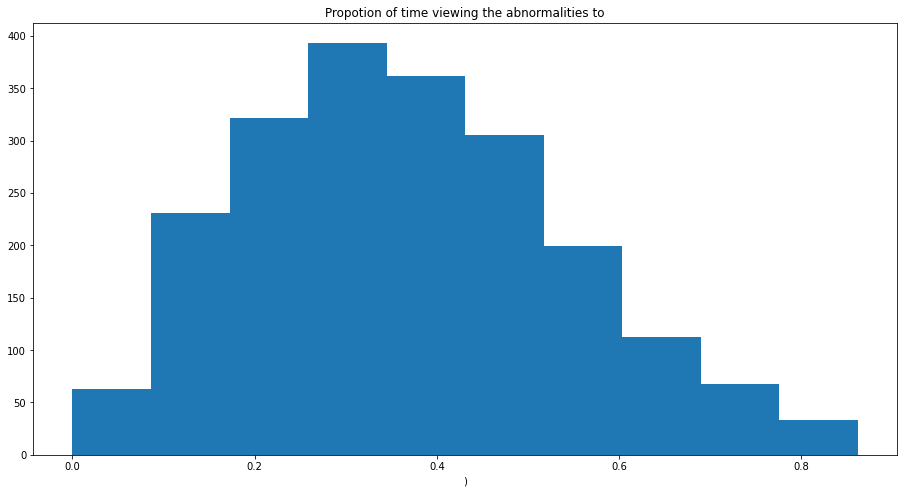

In [52]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
plt.hist([a_tuple[0]/a_tuple[1] for a_tuple in time_at_ab])
plt.title("Propotion of time viewing the abnormalities to")
plt.xlabel(")")
plt.show()

### How long took the diagnostics? 
### If there weren't any abnormalities, would it be faster?

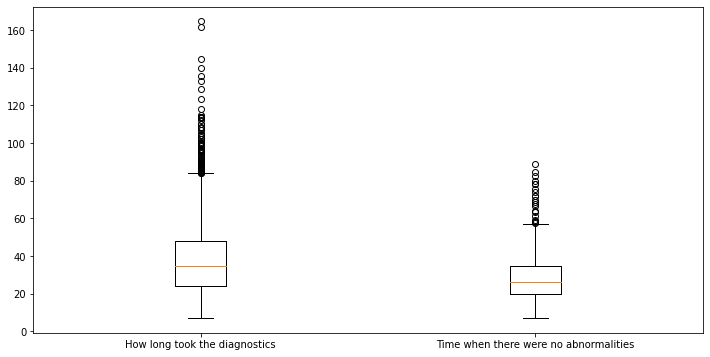

In [50]:
my_dict = {"How long took the diagnostics": time_total, 'Time when there were no abnormalities': time_when_no_ab}

fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

plt.show()